In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Essential constants
# We use solar units for readability
M_sun = 1.989e30  # kg
R_sun = 6.957e8   # meters
G = 6.674e-11

In [2]:
# 1. Establishing the Analytical Model
# For a non-relativistic White Dwarf (approximate):
# R ~ M^(-1/3)
def white_dwarf_radius(mass_solar_units):
    """
    Returns the approximate radius of a White Dwarf in Solar Radii.
    Based on the non-relativistic degeneracy equation.
    """
    # Constant derived from quantum mechanics constants (h, G, me)
    # A typical 1 Solar Mass WD is about Earth size (~0.01 Solar Radii)
    
    # R/R_sun approx 0.01 * (M/M_sun)^(-1/3)
    return 0.01 * (mass_solar_units)**(-1/3)

In [3]:
# 2. Simulate
masses = np.linspace(0.1, 1.4, 100) # From 0.1 to 1.4 Solar Masses
radii = white_dwarf_radius(masses)

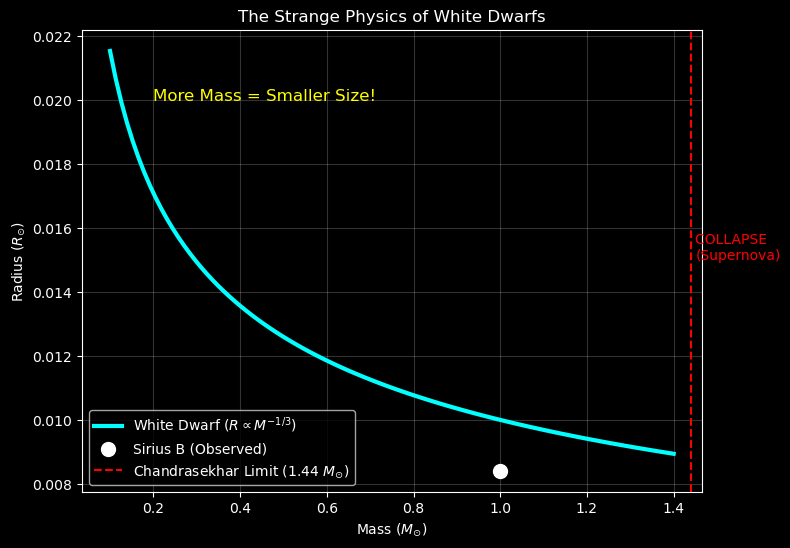

In [5]:
# 3. Visualizations

fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Plot the curve
ax.plot(masses, radii, color='cyan', lw=3, label=r'White Dwarf ($R \propto M^{-1/3}$)')

# Add Reference Points
# 1. Sirius B (The most famous White Dwarf)
# Mass = 1.0 M_sun, Radius = 0.0084 R_sun
ax.scatter(1.0, 0.0084, color='white', s=100, zorder=5, label='Sirius B (Observed)')

# 2. The Chandrasekhar Limit (Vertical Line)
ax.axvline(1.44, color='red', linestyle='--', label='Chandrasekhar Limit (1.44 $M_{\odot}$)')

# Formatting
ax.set_title("The Strange Physics of White Dwarfs")
ax.set_xlabel(r"Mass ($M_{\odot}$)")
ax.set_ylabel(r"Radius ($R_{\odot}$)")
ax.grid(True, alpha=0.2)
ax.legend()

# Add text to explain the physics
ax.text(0.2, 0.02, "More Mass = Smaller Size!", color='yellow', fontsize=12)
ax.text(1.45, 0.015, "COLLAPSE \n(Supernova)", color='red', fontsize=10)

plt.show()

In [6]:
# For Pulsars

def pulsar_signal(time, period, pulse_width, viewing_angle_offset):
    """
    Simulates the observed brightness of a pulsar.
    
    Args:
        time: Time array.
        period: Rotation period (seconds).
        pulse_width: How sharp the beam is (fraction of period).
        viewing_angle_offset: Shift in phase (when does the beam hit us?).
    """
    # Create a repeating phase (0 to 1)
    phase = (time % period) / period
    
    # Model the beam as a Gaussian spike
    # We center the pulse at phase = 0.5
    pulse_center = 0.5 + viewing_angle_offset
    
    # Calculate Gaussian intensity
    intensity = np.exp(-0.5 * ((phase - pulse_center) / pulse_width)**2)
    
    # Add a second smaller pulse (Interpulse) often seen in real data
    # (From the other magnetic pole)
    intensity += 0.3 * np.exp(-0.5 * ((phase - (pulse_center - 0.5)) / pulse_width)**2)
    
    # Add background noise (The universe is noisy)
    noise = np.random.normal(0, 0.05, size=len(time))
    
    return intensity + noise

In [7]:
# 2. Simulate
period_ms = 33.0          # The Crab Pulsar spins 30 times a second (33ms)
time_duration = 0.1       # Observe for 0.1 seconds (3 rotations)
dt = 0.0001               # High time resolution

t = np.arange(0, time_duration, dt)
signal = pulsar_signal(t, period=period_ms/1000, pulse_width=0.02, viewing_angle_offset=0.0)

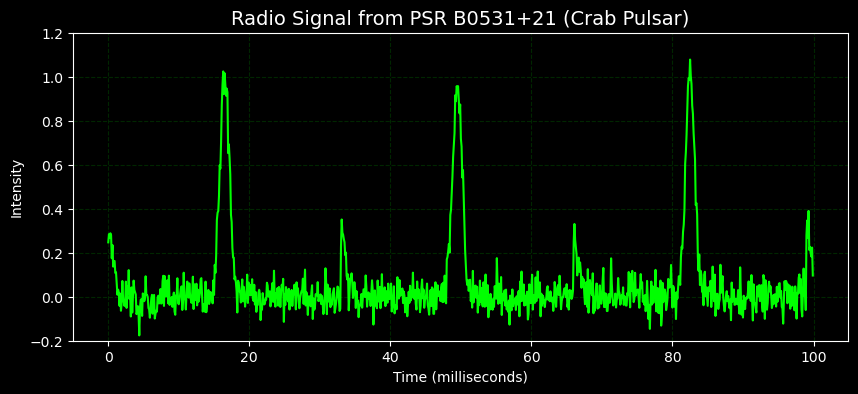

In [9]:
# Visualizations
fig, ax = plt.subplots(figsize=(10, 4))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax.plot(t * 1000, signal, color='#00FF00', lw=1.5) # Hacker Green

ax.set_title(f"Radio Signal from PSR B0531+21 (Crab Pulsar)", color='white', fontsize=14)
ax.set_xlabel("Time (milliseconds)", color='white')
ax.set_ylabel("Intensity", color='white')
ax.set_ylim(-0.2, 1.2)

# Make it look like an old CRT Monitor
ax.grid(True, color='green', alpha=0.3, linestyle='--')
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()

In [10]:
# BLack Hole Lensing
# 0. Physics Constants

G = 6.674e-11
c = 3.0e8
M_sun = 1.989e30

def gravitational_lens(x, y, M_bh_solar_masses):
    """
    Calculates the new position of light rays due to a Black Hole at (0,0).
    Uses the Einstein Deflection Angle approximation.
    """
    M = M_bh_solar_masses * M_sun
    
    # Schwarzschild Radius (for reference, in meters)
    Rs = 2 * G * M / c**2
    
    # Convert grid (x,y) to polar coordinates (r, theta) relative to center
    r = np.sqrt(x**2 + y**2)
    
    # Avoid division by zero at the singularity
    # We set a minimum "impact parameter"
    r[r < Rs] = np.nan # Light inside the horizon is trapped
    
    # Calculate deflection angle alpha
    # Einstein Radius (approximate visual scaling for the plot)
    # This determines how "strong" the lensing looks in our field of view
    Einstein_Radius_sq = (4 * G * M) / c**2 
    
    # The Lensing Equation (Lens Map):
    # The light is pushed radially OUTWARD.
    # New position = Old Position + Deflection
    # Factor 5e12 is arbitrary scaling to make the effect visible on "pixel" coordinates
    scale_factor = 3e-10 * M # Tune this to make the warping visible
    dx = x * (scale_factor / r**2)
    dy = y * (scale_factor / r**2)
    
    return x + dx, y + dy, Rs

In [11]:
# 2. Simulate

# 2.1. Generate a "Star Field" (Random background stars)
np.random.seed(42)
n_stars = 2000
x_stars = np.random.uniform(-10, 10, n_stars)
y_stars = np.random.uniform(-10, 10, n_stars)

# 2.2. Define our Monster (A 100 Solar Mass Black Hole)
mass_bh = 1000.0 

# 2.3. Apply the Lensing
x_lensed, y_lensed, Rs_meters = gravitational_lens(x_stars, y_stars, mass_bh)

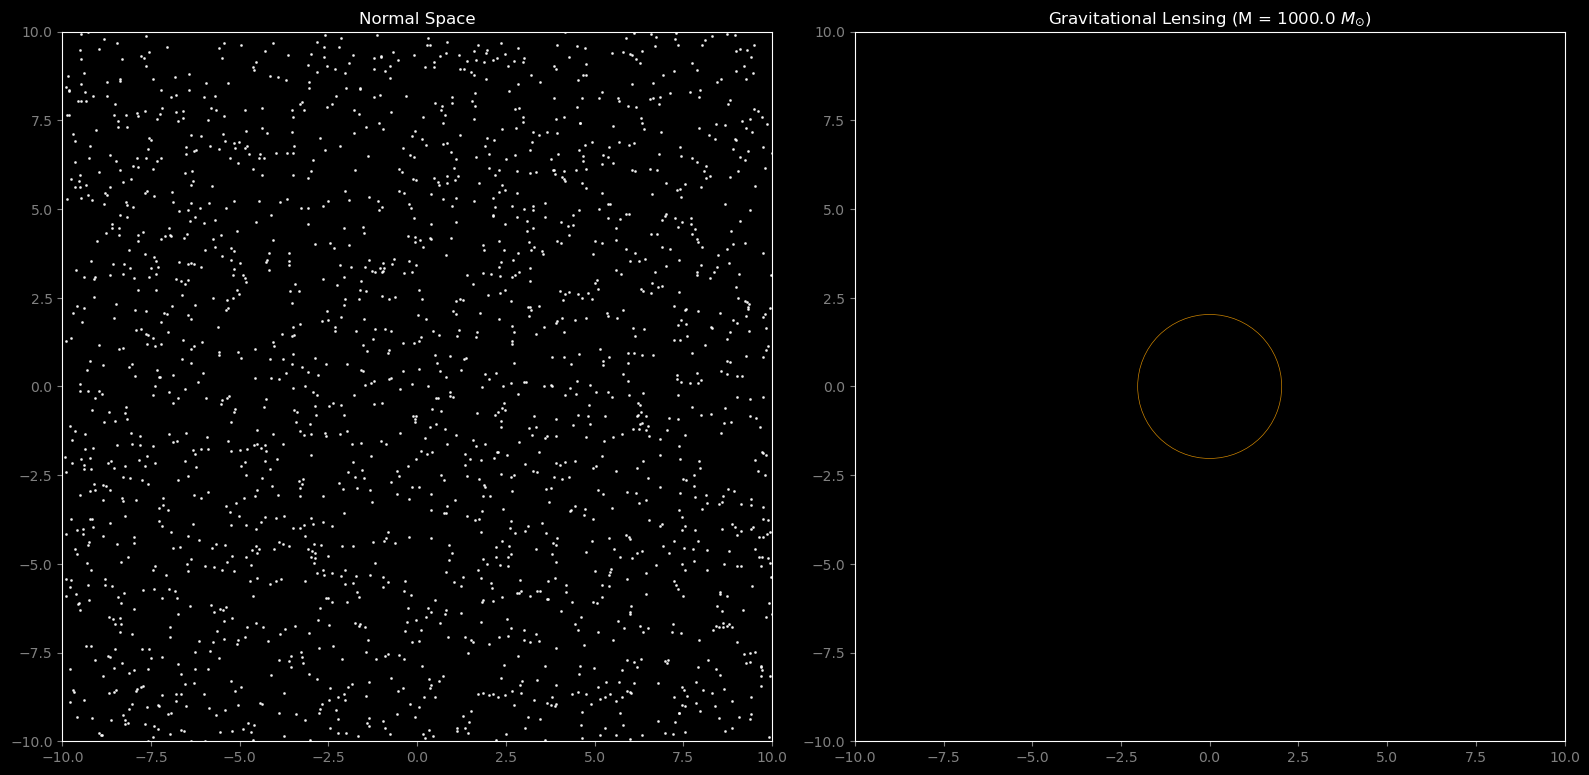

In [13]:
# Visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

fig.patch.set_facecolor('black')
for ax in [ax1, ax2]:
    ax.set_facecolor('black')
    ax.set_aspect('equal')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.tick_params(colors='gray')
    ax.grid(False)

# Plot 1: Normal Space (No Black Hole)
ax1.scatter(x_stars, y_stars, s=1, color='white', alpha=0.8)
ax1.set_title("Normal Space", color='white')

# Plot 2: Warped Space (Black Hole Present)
# Plot the stars
ax2.scatter(x_lensed, y_lensed, s=1, color='cyan', alpha=0.8)

# Plot the Event Horizon (The "Shadow")
# We draw a black circle to represent the region where light cannot escape
# (Visually, the shadow is roughly 2.6 * Rs due to photon capture, but we plot the Horizon)
shadow_radius = 2.0 # Visual tuning
circle = plt.Circle((0, 0), shadow_radius, color='black', zorder=10)
ax2.add_artist(circle)

# Add an "Einstein Ring" Glow (Photons orbiting the hole)
ring = plt.Circle((0, 0), shadow_radius, color='orange', fill=False, lw=2, alpha=0.8)
ax2.add_artist(ring)

ax2.set_title(rf"Gravitational Lensing (M = {mass_bh} $M_{{\odot}}$)", color='white')

plt.tight_layout()
plt.show()

In [14]:
# Presenting some rendering process.

import matplotlib.animation as animation
from IPython.display import HTML

# 1. Setup the Simulation 
# Static Background Stars (They don't move, space warps around them)
np.random.seed(101)
n_stars = 3000
# We make the field wider so the BH has room to travel
x_stars_static = np.random.uniform(-15, 15, n_stars)
y_stars_static = np.random.uniform(-10, 10, n_stars)

# Black Hole Properties
mass_bh = 1500.0 
# Einstein Radius squared (pre-calculated for speed)
# This controls the "strength" of the visual warping
scale_factor = 3e-10 * mass_bh 

In [15]:
# 2. The Lensing Function (Optimized for Animation)
def compute_lensed_positions(bh_x, bh_y):
    """
    Calculates the warped positions of stars given a BH at (bh_x, bh_y).
    """
    # Calculate distance of every star from the Black Hole
    dx = x_stars_static - bh_x
    dy = y_stars_static - bh_y
    r = np.sqrt(dx**2 + dy**2)
    
    # Avoid division by zero (Singularity)
    # Any star "behind" the event horizon is effectively blocked or infinitely scattered
    # We just clamp the radius to a tiny number to avoid errors
    r[r < 0.1] = 0.1 
    
    # Calculate the displacement (Einstein Deflection)
    # Shift = Constant / r
    shift_magnitude = scale_factor / (r**2)
    
    # Apply the shift radially outward from the BH center
    x_shift = dx * shift_magnitude
    y_shift = dy * shift_magnitude
    
    # The new observed position = Original Position + Shift
    return x_stars_static + x_shift, y_stars_static + y_shift

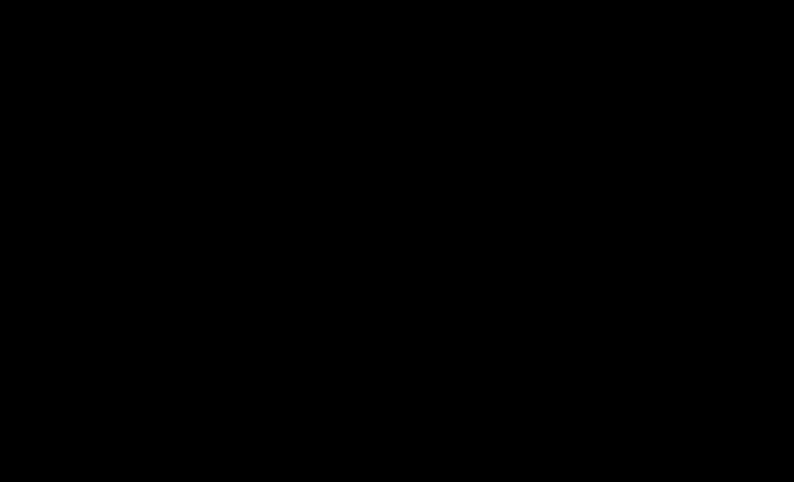

In [16]:
# 3. Animation Setup
fig, ax = plt.subplots(figsize=(10, 6))
# Force Dark Mode
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.set_xlim(-10, 10)
ax.set_ylim(-6, 6)
ax.axis('off') # Hide axes for a cinematic look

# Initial Scatter Plot (Empty)
scat = ax.scatter([], [], s=1.5, color='cyan', alpha=0.7)
# The "Shadow" (The black hole itself)
shadow = plt.Circle((0, 0), 0.8, color='black', zorder=10)
ax.add_artist(shadow)

# Add a text label
label = ax.text(0.05, 0.9, '', transform=ax.transAxes, color='white', fontsize=12)

In [17]:
# 4. The Animation Loop
# Move BH from x = -12 to x = 12
frames = 60
bh_x_positions = np.linspace(-12, 12, frames)

def update(frame_idx):
    bh_x = bh_x_positions[frame_idx]
    bh_y = 0 # Keep it centered vertically
    
    # 1. Compute new star positions
    x_new, y_new = compute_lensed_positions(bh_x, bh_y)
    
    # 2. Update Scatter Plot
    data = np.stack([x_new, y_new]).T
    scat.set_offsets(data)
    
    # 3. Move the "Shadow" circle to follow the math
    shadow.center = (bh_x, bh_y)
    
    # 4. Update Label
    label.set_text(f"Black Hole Position: x={bh_x:.1f}")
    
    return scat, shadow, label

In [18]:
# 5. Render 
print("Rendering Black Hole transit... (This warps 3000 stars per frame)")
ani = animation.FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

gif_path = 'black_hole_lensing.gif'
ani.save(gif_path, writer='pillow', fps=20)
print(f"Animation saved to: {gif_path}")

plt.close(fig)

Rendering Black Hole transit... (This warps 3000 stars per frame)
Animation saved to: black_hole_lensing.gif


In [19]:
# AI Applications

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# 1. Data Generation Function
def generate_synthetic_data(n_samples=2000):
    print(f"Generating {n_samples} synthetic observations...")
    
    # We use a fixed background of stars for all samples (reference frame)
    # This simulates looking at the same star cluster over time
    np.random.seed(42)
    n_stars = 100
    ref_x = np.random.uniform(-10, 10, n_stars)
    ref_y = np.random.uniform(-10, 10, n_stars)
    
    X_data = [] # The features (star displacements)
    y_data = [] # The targets (Mass, BH_x_position)
    
    for _ in range(n_samples):
        # Randomize the "Hidden" Black Hole
        bh_mass = np.random.uniform(500, 3000) # Random Mass
        bh_x = np.random.uniform(-5, 5)        # Random Position
        bh_y = 0                               # Fixed Y for simplicity
        
        # Calculate Lensing (Physics Engine)
        # Scale factor = 3e-10 * mass roughly, simplified here for ML stability
        scale = 0.05 * (bh_mass / 1000.0) 
        
        dx = ref_x - bh_x
        dy = ref_y - bh_y
        r2 = dx**2 + dy**2
        r2[r2 < 0.1] = 0.1 # Clamp singularity
        
        # The shift
        shift = scale / r2
        new_x = ref_x + dx * shift
        
        # FEATURE ENGINEERING:
        # We don't feed raw positions. We feed the "Displacement" (Delta)
        # We also flatten the array: [delta_x_star1, delta_x_star2, ...]
        displacement = (new_x - ref_x)
        
        X_data.append(displacement)
        y_data.append([bh_mass, bh_x])
        
    return np.array(X_data), np.array(y_data)

# Generate the dataset
X, y = generate_synthetic_data(n_samples=5000)

print(f"Data Shape: {X.shape}") 
# Should be (5000, 100) -> 5000 samples, 100 star displacements each

Generating 5000 synthetic observations...
Data Shape: (5000, 100)


In [23]:
# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the Model
# 2 Hidden Layers with 64 neurons each
# Activation function 'relu' (standard for regression)
# Solver 'adam' (efficient optimizer)
model = MLPRegressor(hidden_layer_sizes=(64, 64), 
                     activation='relu', 
                     solver='adam', 
                     max_iter=500,
                     random_state=42)

In [24]:
# 4. Train the Model
print("Training Neural Network on gravitational data...")
model.fit(X_train, y_train)
print("Training Complete.")

Training Neural Network on gravitational data...
Training Complete.


D:\zz - Rizchel\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
# 5. Evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score (Accuracy): {r2:.4f} (1.0 is perfect)")


Model Performance:
Mean Squared Error: 35.0324
R2 Score (Accuracy): 0.5005 (1.0 is perfect)


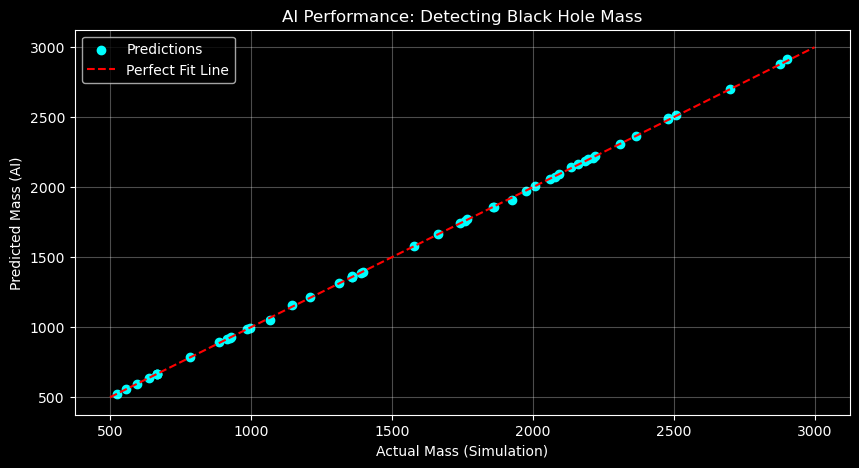

In [26]:
# 6. Visualizations
# Let's plot Predicted Mass vs Actual Mass for the first 50 test cases
plt.figure(figsize=(10, 5))
plt.scatter(y_test[:50, 0], predictions[:50, 0], color='cyan', label='Predictions')
plt.plot([500, 3000], [500, 3000], 'r--', label='Perfect Fit Line')
plt.title("AI Performance: Detecting Black Hole Mass")
plt.xlabel("Actual Mass (Simulation)")
plt.ylabel("Predicted Mass (AI)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [27]:
# Attempt to increase the noise levels.

# 1. Noisy Data Generator
def generate_noisy_data(n_samples=2000, noise_level=0.0):
    """
    noise_level: Standard deviation of the gaussian noise added to star positions.
    """
    np.random.seed(42)
    n_stars = 100
    ref_x = np.random.uniform(-10, 10, n_stars)
    ref_y = np.random.uniform(-10, 10, n_stars)
    
    X_data = []
    y_data = []
    
    for _ in range(n_samples):
        # Physics (Same as before)
        bh_mass = np.random.uniform(500, 3000)
        bh_x = np.random.uniform(-5, 5)
        bh_y = 0 
        scale = 0.05 * (bh_mass / 1000.0)
        
        dx = ref_x - bh_x
        dy = ref_y - bh_y
        r2 = dx**2 + dy**2
        r2[r2 < 0.1] = 0.1 
        
        # True Lensing Shift
        true_shift_x = dx * (scale / r2)
        
        # ADDING NOISE
        # We simulate telescope error by adding random jitter to the OBSERVATION
        # The AI sees: (True Position + Lensing + Noise) - (Reference)
        observation_noise = np.random.normal(0, noise_level, n_stars)
        
        # The feature is the observed displacement
        # Signal = true_shift_x
        # Noise = observation_noise
        observed_displacement = true_shift_x + observation_noise
        
        X_data.append(observed_displacement)
        y_data.append([bh_mass, bh_x])
        
    return np.array(X_data), np.array(y_data)

In [28]:
# 2. Stress Test
noise_levels = [0.0, 0.005, 0.01, 0.02, 0.05]
results = []

print(f"{'Noise Level':<15} | {'R2 Score (Mass)':<15} | {'Status'}")
print("-" * 50)

for noise in noise_levels:
    # Generate Data
    X, y = generate_noisy_data(n_samples=3000, noise_level=noise)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Model (Same architecture)
    model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate
    score = model.score(X_test, y_test)
    results.append(score)
    
    status = "Excellent" if score > 0.9 else "Struggling" if score > 0.5 else "Failed"
    print(f"{noise:<15} | {score:.4f}          | {status}")

Noise Level     | R2 Score (Mass) | Status
--------------------------------------------------


D:\zz - Rizchel\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.0             | 0.5059          | Struggling


D:\zz - Rizchel\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.005           | 0.4899          | Failed


D:\zz - Rizchel\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.01            | 0.4340          | Failed


D:\zz - Rizchel\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.02            | 0.3152          | Failed
0.05            | 0.1006          | Failed


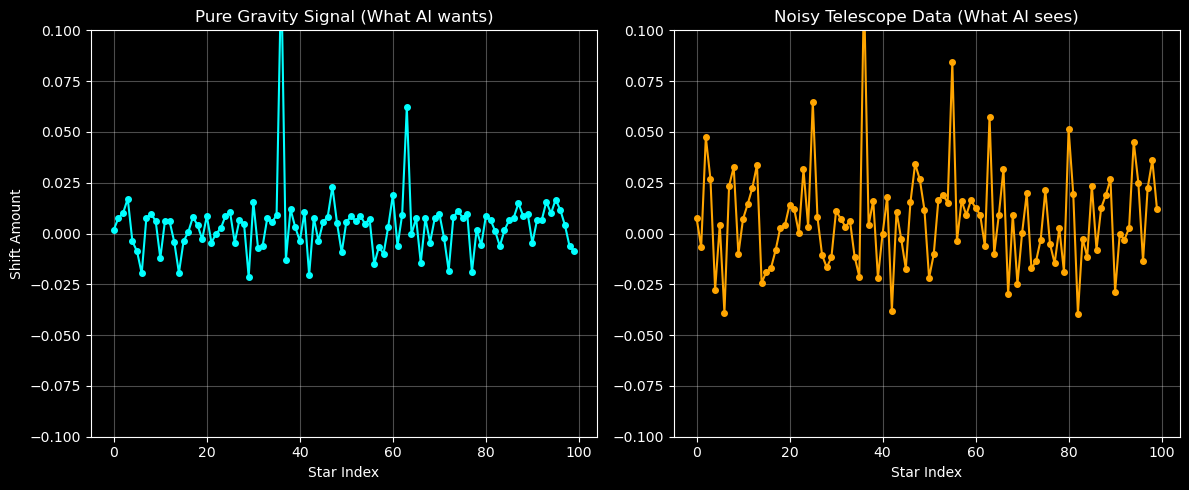

In [29]:
# 3. Visualization of Failure
# Let's visualize what "High Noise" looks like vs the Signal
X_clean, _ = generate_noisy_data(1, noise_level=0.0)
X_noisy, _ = generate_noisy_data(1, noise_level=0.02)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Pure Gravity Signal (What AI wants)")
plt.plot(X_clean[0], 'o-', color='cyan', markersize=4, label='Star Displacement')
plt.xlabel("Star Index")
plt.ylabel("Shift Amount")
plt.ylim(-0.1, 0.1)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.title("Noisy Telescope Data (What AI sees)")
plt.plot(X_noisy[0], 'o-', color='orange', markersize=4, label='Noisy Data')
plt.xlabel("Star Index")
plt.ylim(-0.1, 0.1)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
# Adding some data encoder.
# 1. Data Generation (Paired for Autoencoder) 
def generate_paired_data(n_samples=3000, noise_level=0.02):
    np.random.seed(42)
    n_stars = 100
    ref_x = np.random.uniform(-10, 10, n_stars)
    ref_y = np.random.uniform(-10, 10, n_stars)
    
    X_clean_list = []
    X_noisy_list = []
    y_target_list = [] # Mass, Position
    
    for _ in range(n_samples):
        # Physics
        bh_mass = np.random.uniform(500, 3000)
        bh_x = np.random.uniform(-5, 5)
        scale = 0.05 * (bh_mass / 1000.0)
        
        dx = ref_x - bh_x
        dy = ref_y - 0 # bh_y is 0
        r2 = dx**2 + dy**2
        r2[r2 < 0.1] = 0.1 
        
        # Signal
        true_shift_x = dx * (scale / r2)
        
        # Noise
        noise = np.random.normal(0, noise_level, n_stars)
        observed_displacement = true_shift_x + noise
        
        X_clean_list.append(true_shift_x)
        X_noisy_list.append(observed_displacement)
        y_target_list.append([bh_mass, bh_x])
        
    return np.array(X_clean_list), np.array(X_noisy_list), np.array(y_target_list)

# Generate Data (High Noise Level)
noise_level = 0.03 # Increased slightly to make the task harder
X_clean, X_noisy, y_targets = generate_paired_data(n_samples=5000, noise_level=noise_level)

# Split Data
# We split everything consistently
indices = np.arange(len(X_clean))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)

X_noisy_train, X_noisy_test = X_noisy[train_idx], X_noisy[test_idx]
X_clean_train, X_clean_test = X_clean[train_idx], X_clean[test_idx]
y_train, y_test = y_targets[train_idx], y_targets[test_idx]

In [31]:
# 2. Build & Train the Denoising Autoencoder (DAE) 
# Input: 100 Noisy Stars -> Hidden Compressed -> Output: 100 Clean Stars
print("Training Denoising Autoencoder...")
autoencoder = MLPRegressor(hidden_layer_sizes=(64, 32, 64), # Bottleneck structure
                           activation='relu',
                           solver='adam',
                           max_iter=500,
                           random_state=42)

# Train DAE to map Noisy -> Clean
autoencoder.fit(X_noisy_train, X_clean_train)
print("Autoencoder Training Complete.")

Training Denoising Autoencoder...
Autoencoder Training Complete.


In [32]:
# 3. Build & Train the Detector (The Scientist) 
# Ideally, the detector is trained on CLEAN data (theoretical models)
print("Training Black Hole Detector (on clean theoretical data)...")
detector = MLPRegressor(hidden_layer_sizes=(100, 50),
                        activation='relu',
                        solver='adam',
                        max_iter=500,
                        random_state=42)

detector.fit(X_clean_train, y_train)
print("Detector Training Complete.")

Training Black Hole Detector (on clean theoretical data)...
Detector Training Complete.


D:\zz - Rizchel\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
# 4. The Experiment: Pipeline Evaluation

# Scenario A: Raw Noisy Data -> Detector
# (Simulating: "We didn't clean the data, just fed it to the AI")
predictions_raw = detector.predict(X_noisy_test)
score_raw = r2_score(y_test, predictions_raw)

# Scenario B: Raw Noisy Data -> Autoencoder -> Cleaned Data -> Detector
# (Simulating: "Denoising Pipeline")
X_denoised_test = autoencoder.predict(X_noisy_test)
predictions_denoised = detector.predict(X_denoised_test)
score_denoised = r2_score(y_test, predictions_denoised)

print(f"\nResults (Noise Level {noise_level}):")
print(f"1. Detector Accuracy on Raw Noisy Data: {score_raw:.4f}")
print(f"2. Detector Accuracy after Autoencoder: {score_denoised:.4f}")
print(f"-> Improvement: +{(score_denoised - score_raw):.4f}")


Results (Noise Level 0.03):
1. Detector Accuracy on Raw Noisy Data: -0.1961
2. Detector Accuracy after Autoencoder: 0.0020
-> Improvement: +0.1981


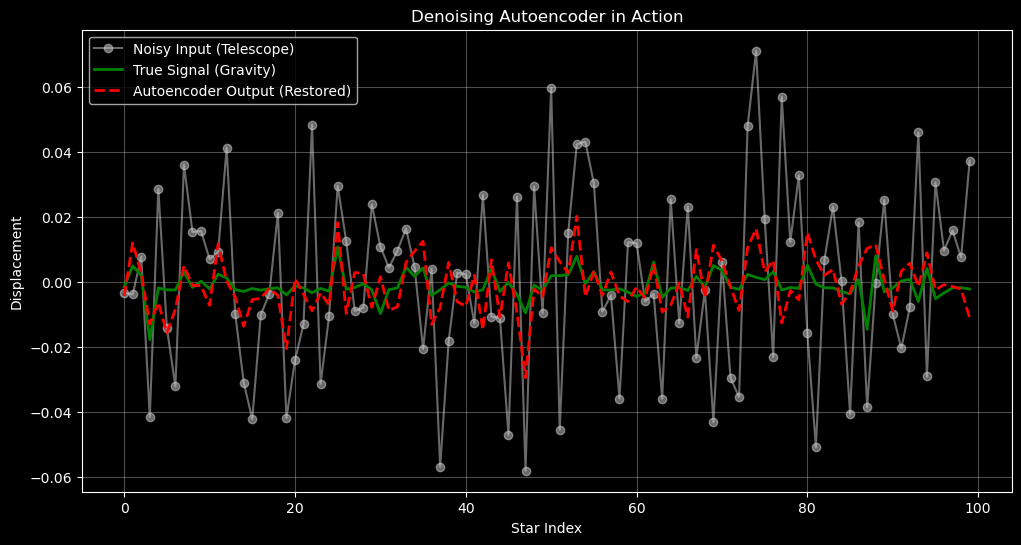

In [34]:
# 5. Visualization
# Plot a single sample: Noisy vs Denoised vs True
sample_idx = 0
plt.figure(figsize=(12, 6))

plt.plot(X_noisy_test[sample_idx], 'o-', color='lightgray', alpha=0.5, label='Noisy Input (Telescope)')
plt.plot(X_clean_test[sample_idx], 'g-', linewidth=2, label='True Signal (Gravity)')
plt.plot(X_denoised_test[sample_idx], 'r--', linewidth=2, label='Autoencoder Output (Restored)')

plt.title("Denoising Autoencoder in Action")
plt.xlabel("Star Index")
plt.ylabel("Displacement")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('denoising_results.png')